Verzeichnis 'Plots' existiert bereits.
Bereinigter Datensatz erfolgreich geladen!
Datenarten:
Jahr                              int64
Monat                             int64
Mitarbeiter_ID                    int64
Name                             object
Geschlecht                       object
Einstellungsdatum                object
Austrittsdatum                   object
Position                         object
Education Level                  object
Alter                             int64
Geburtsdatum                     object
Gehaltsgruppe                    object
Grundausbildung                  object
Interne Weiterbildungen           int64
Planstelle                       object
Zeit bis zur Rente                int64
Verheiratet                      object
Kinder                           object
Urlaubstage_genommen              int64
Überstunden                       int64
Fehlzeiten_Krankheitstage         int64
Abwesenheitsgrund                object
Jährliche Leistungsbewertu

/var/folders/c2/v0sg9lwj2x727g69jw91tvcc0000gn/T/ipykernel_31143/132931119.py:167: DeprecationWarning: support for supplying keyword arguments to pathlib.PurePath is deprecated and scheduled for removal in Python 3.14
  data_file_path = Path("HR_cleaned.csv", low_memory=False)


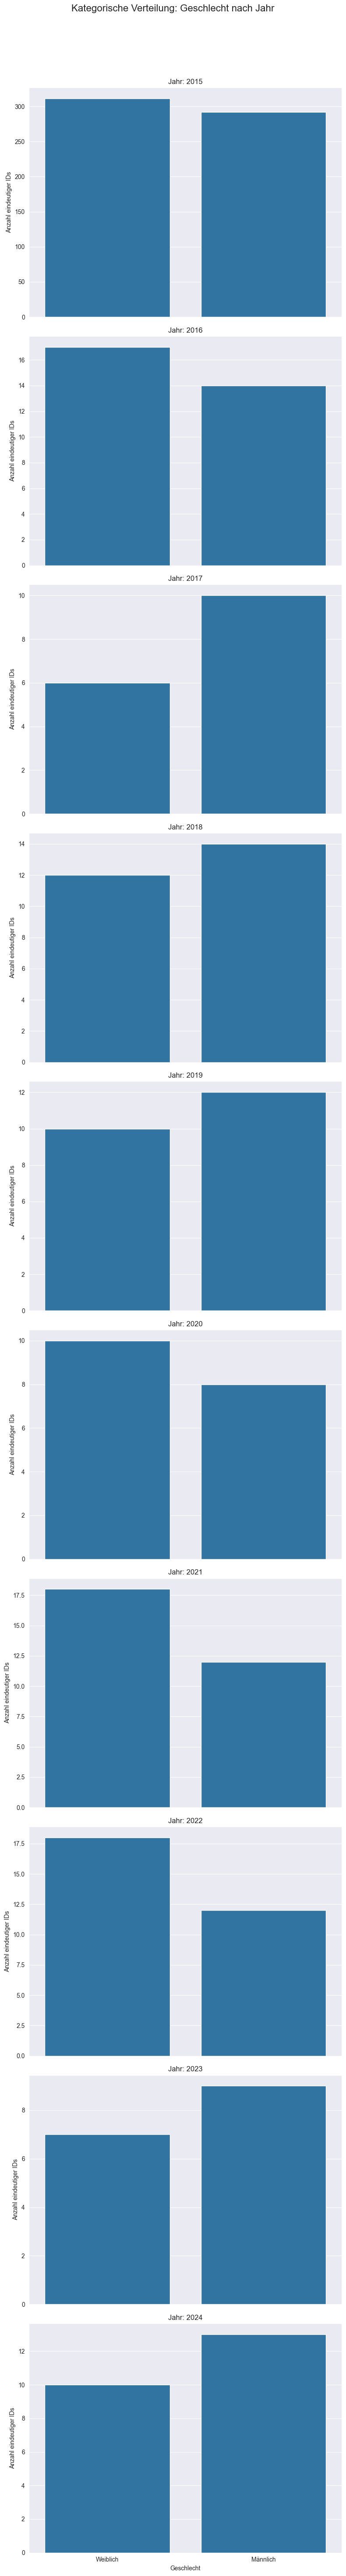

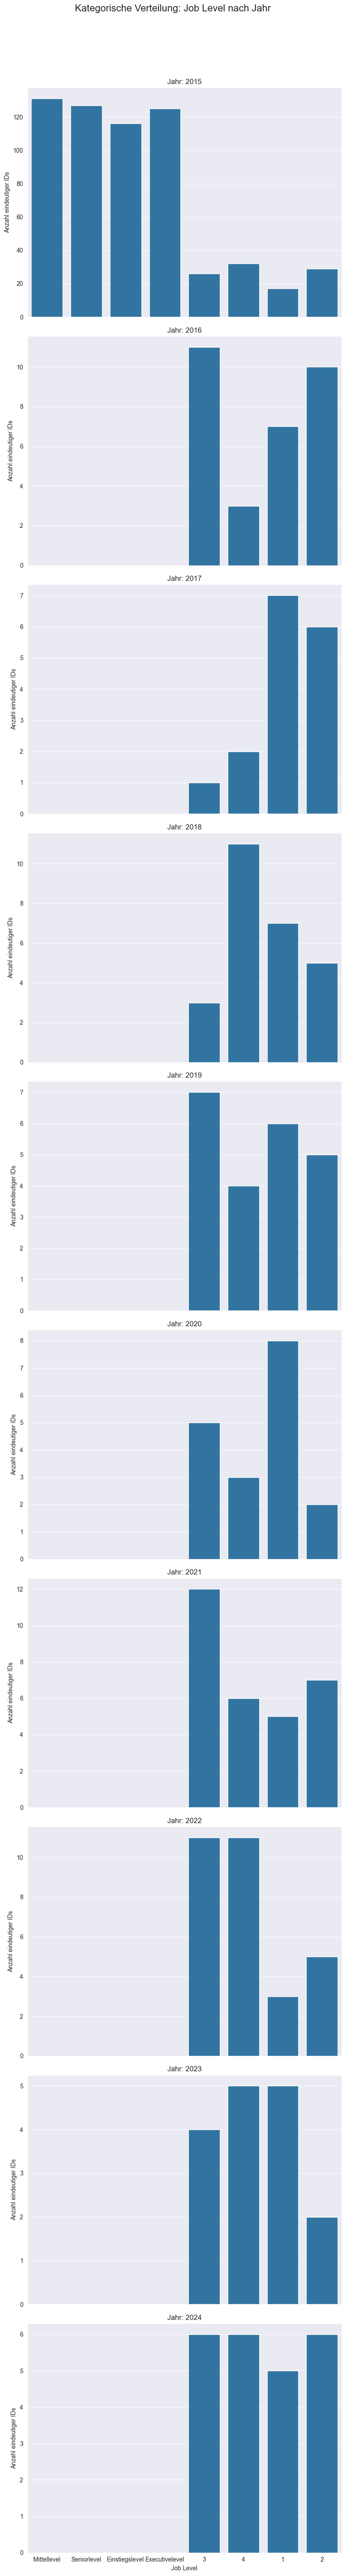


Skewness und Kurtosis für numerische Spalten:
Jahr: Skewness = -0.00, Kurtosis = -1.22
Monat: Skewness = 0.00, Kurtosis = -1.22
Mitarbeiter_ID: Skewness = -0.08, Kurtosis = -1.14
Alter: Skewness = -0.09, Kurtosis = -0.81
Interne Weiterbildungen: Skewness = 0.01, Kurtosis = -1.27
Zeit bis zur Rente: Skewness = 0.09, Kurtosis = -0.81
Urlaubstage_genommen: Skewness = -0.00, Kurtosis = -1.50
Überstunden: Skewness = 0.82, Kurtosis = 0.67
Fehlzeiten_Krankheitstage: Skewness = 1.79, Kurtosis = 3.48
Jährliche Leistungsbewertung: Skewness = 0.01, Kurtosis = -1.30
Wechselbereitschaft: Skewness = 0.00, Kurtosis = -1.20
Fortbildungskosten: Skewness = 0.95, Kurtosis = -0.59
Anzahl Untergebene: Skewness = 2.58, Kurtosis = 5.12
Gehalt: Skewness = 1.24, Kurtosis = 0.91
Workplace Flexibility: Skewness = -0.02, Kurtosis = -1.23
Team Size: Skewness = -0.01, Kurtosis = -1.23
Zufriedenheit: Skewness = -1.70, Kurtosis = 2.06
Tenure: Skewness = -0.25, Kurtosis = -0.60

️Erstelle Histogramme für numerische S

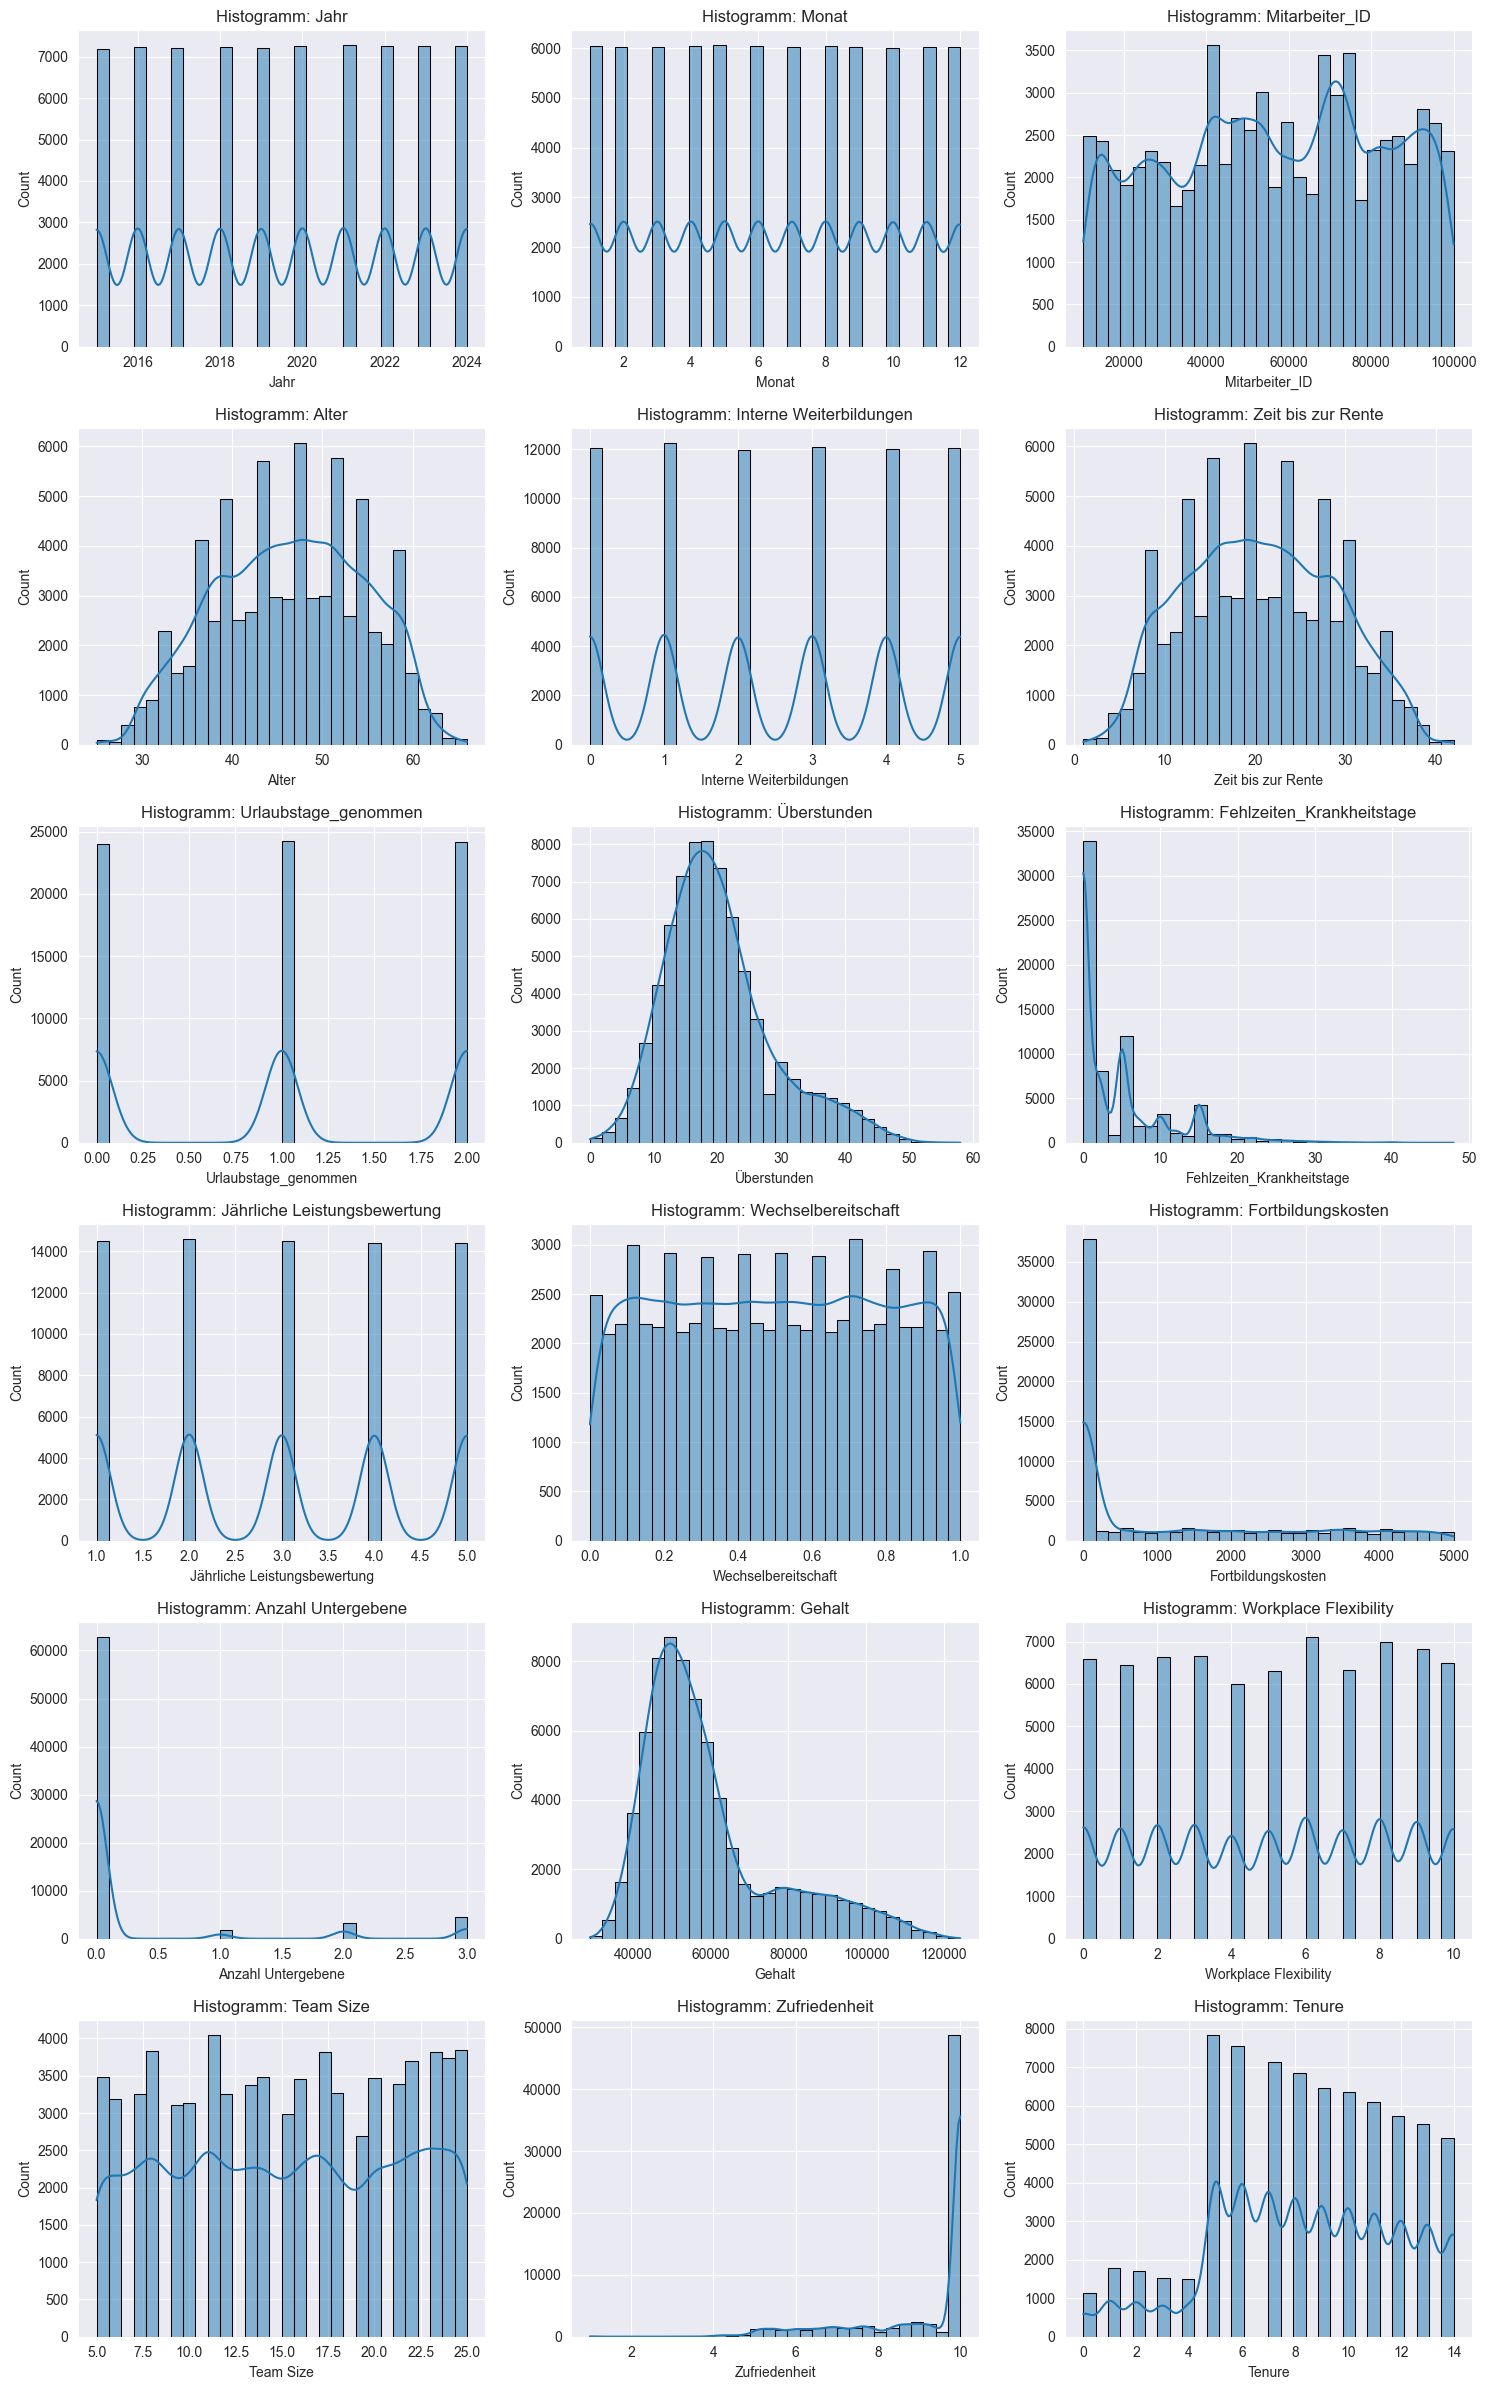


Erstelle eine kompakte Ansicht von Scatterplots...


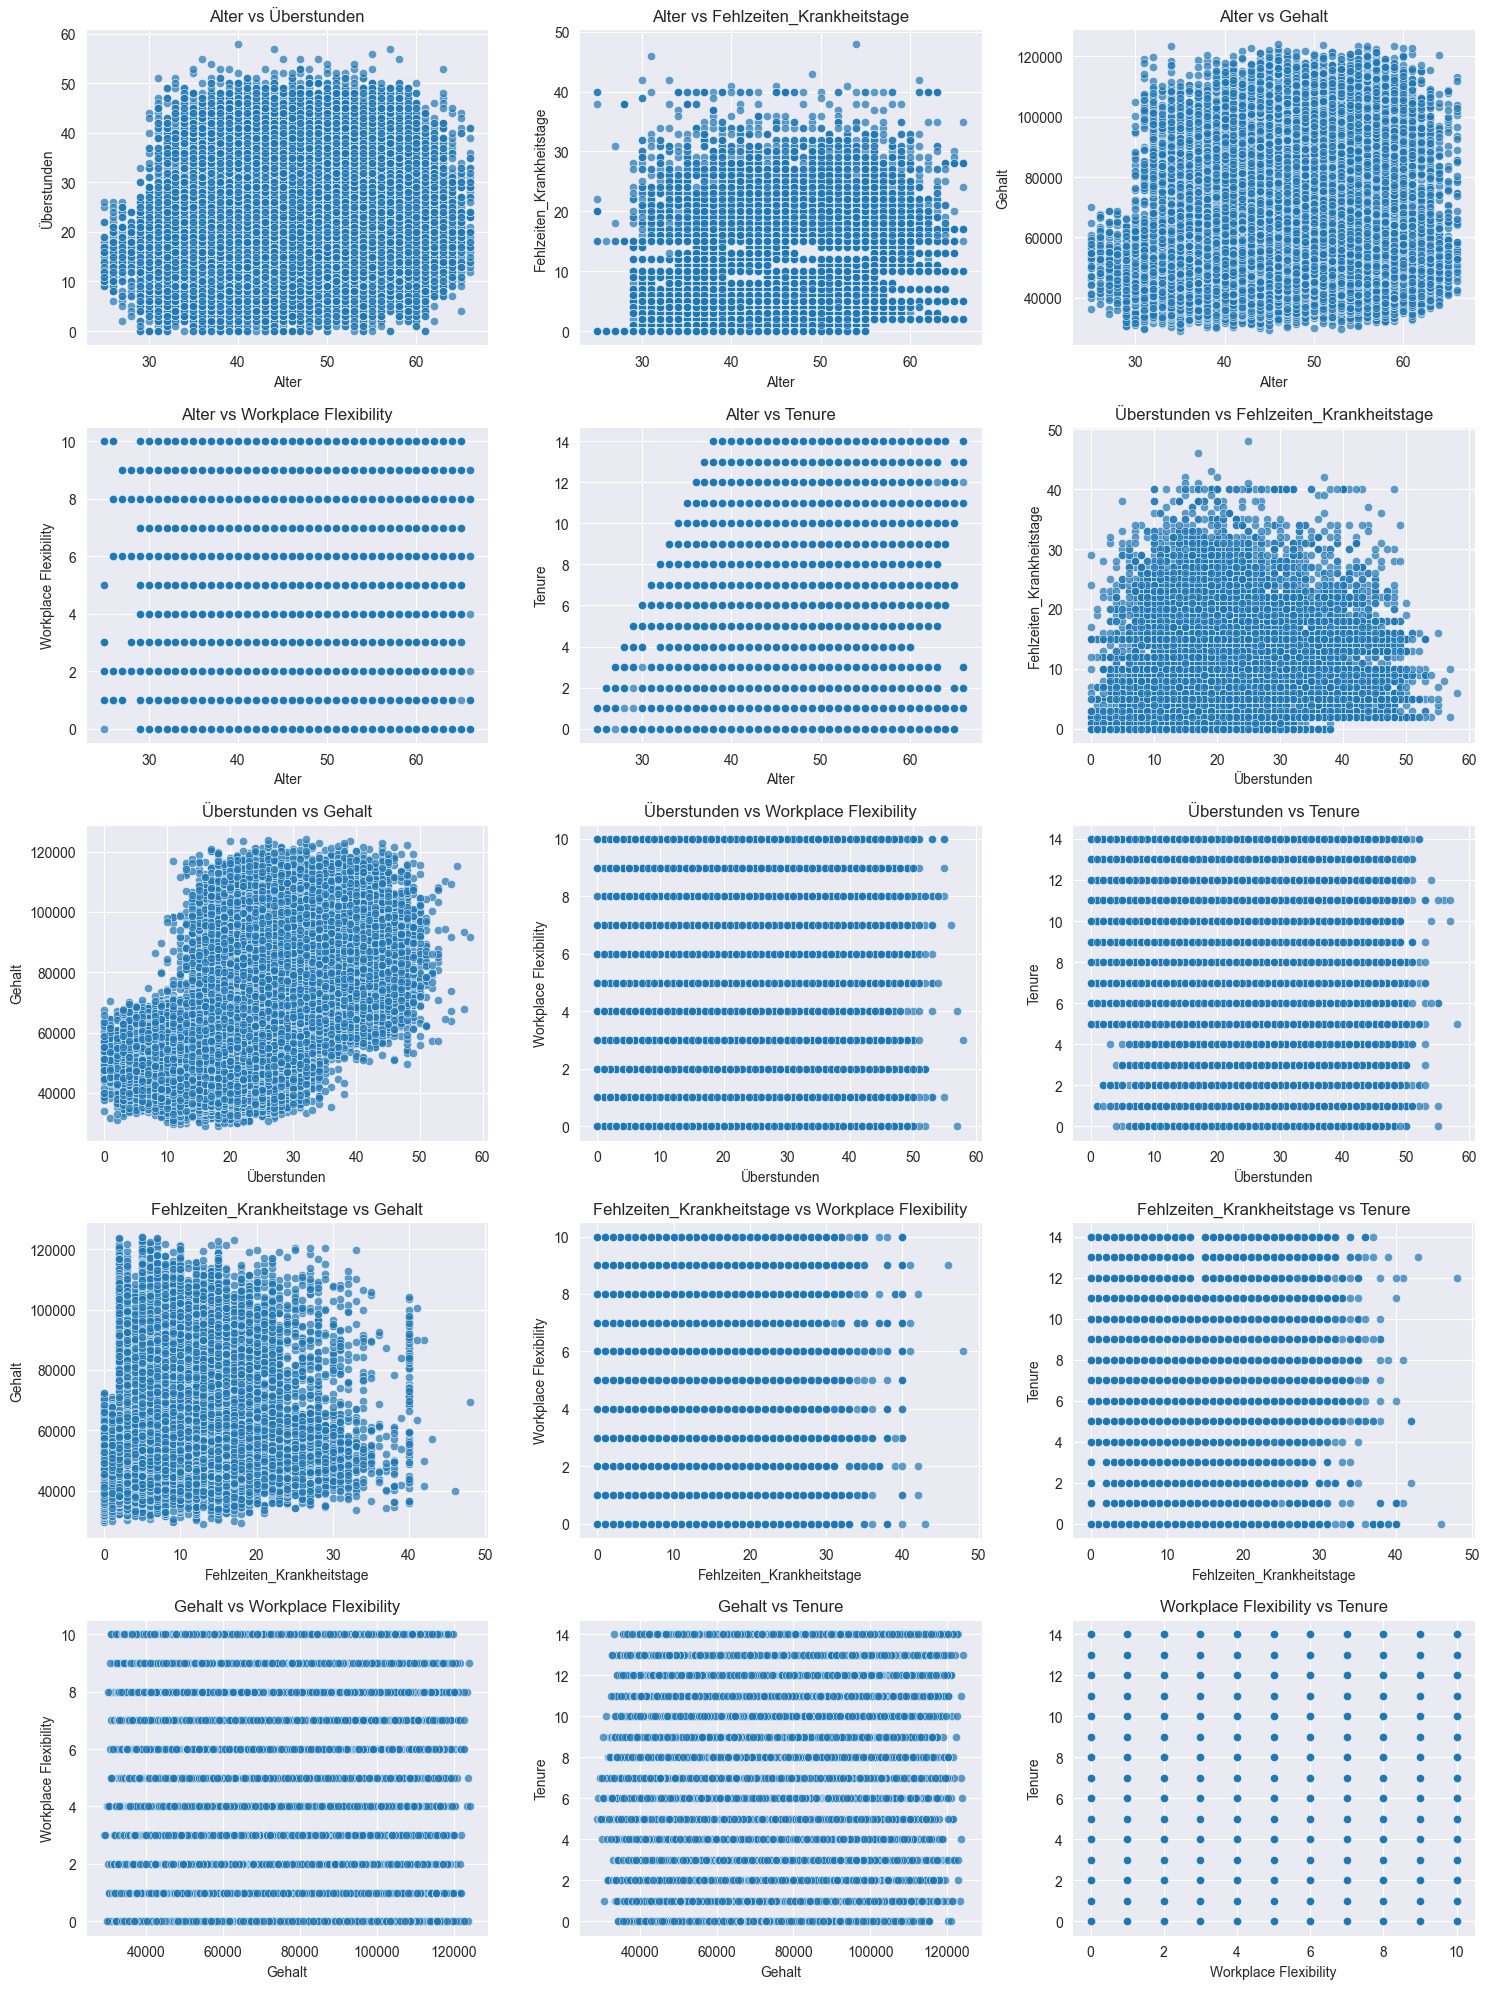


Erstelle Heatmap der Korrelationsmatrix...
                                  Jahr     Monat  Mitarbeiter_ID     Alter  \
Jahr                          1.000000 -0.000459       -0.006688  0.210334   
Monat                        -0.000459  1.000000       -0.000869  0.021016   
Mitarbeiter_ID               -0.006688 -0.000869        1.000000 -0.000358   
Alter                         0.210334  0.021016       -0.000358  1.000000   
Interne Weiterbildungen      -0.003320  0.002759        0.003633 -0.000200   
Zeit bis zur Rente           -0.210334 -0.021016        0.000358 -1.000000   
Urlaubstage_genommen          0.000110  0.004168       -0.002547 -0.001600   
Überstunden                   0.039217  0.002594       -0.008999  0.187599   
Fehlzeiten_Krankheitstage     0.027399 -0.001773        0.028961  0.156596   
Jährliche Leistungsbewertung -0.000104 -0.004821        0.001325 -0.000980   
Wechselbereitschaft          -0.006397  0.007228        0.003751 -0.003261   
Fortbildungskosten  

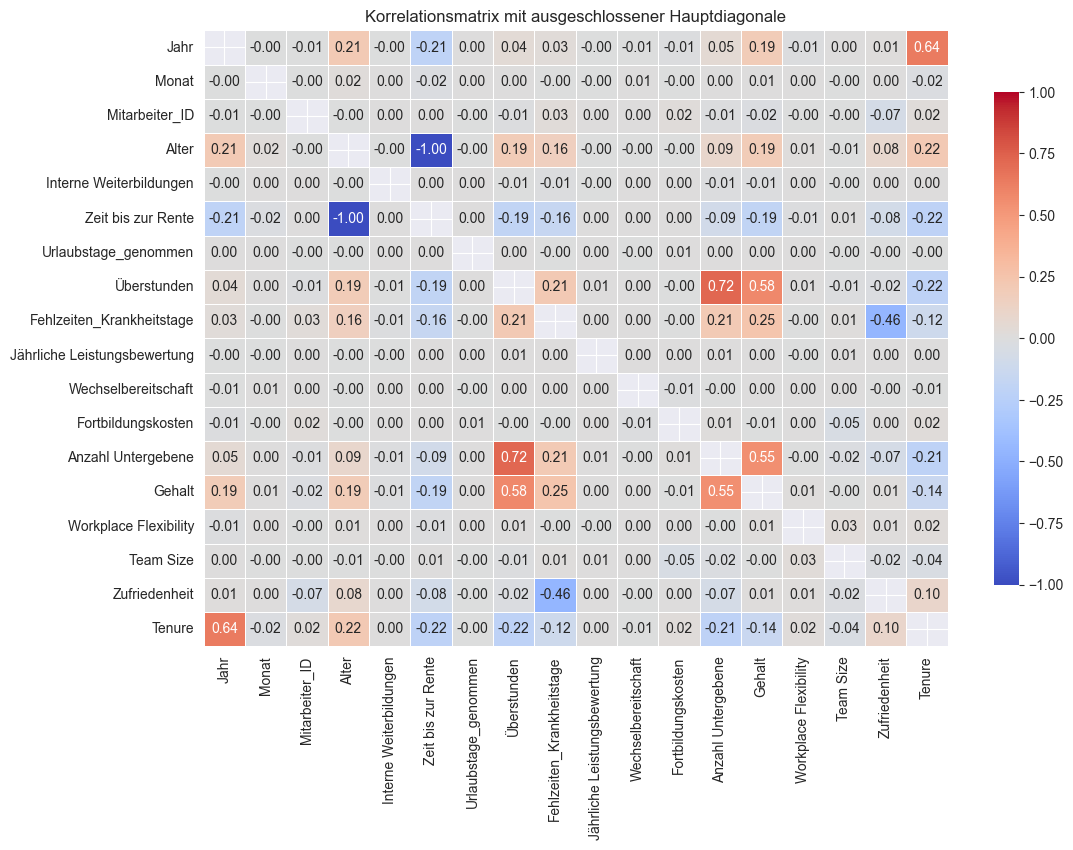

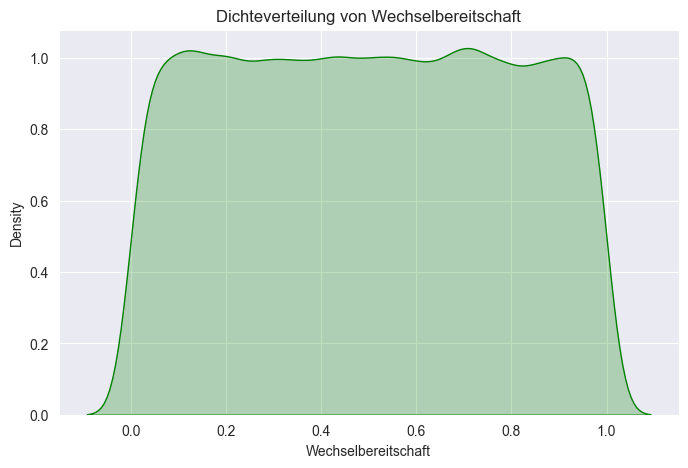


Erstelle WordCloud für 'Job Role Progression'...


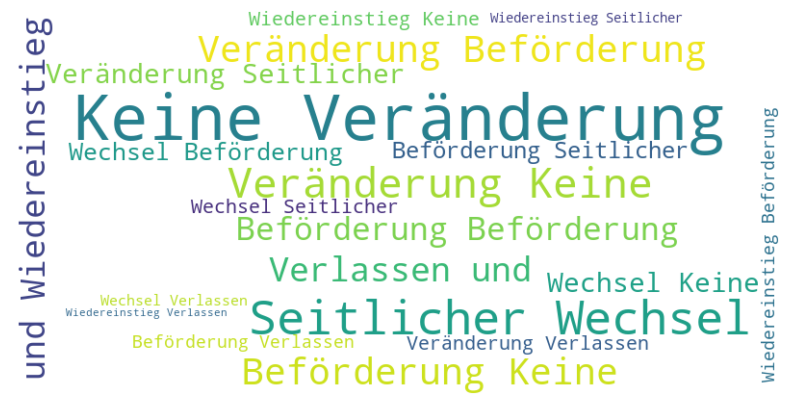

Analyse abgeschlossen in 6.17 Sekunden.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import time
from pathlib import Path
from wordcloud import WordCloud
import missingno as msno  # Visualisierung von fehlenden Werten


# Funktion: Sicherstellen, dass ein Verzeichnis existiert
def ensure_dir_exists(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)
        print(f"Verzeichnis '{directory}' wurde erstellt.")
    else:
        print(f"Verzeichnis '{directory}' existiert bereits.")


def plot_combined_unique_employee_ids_by_year(df, column_name, year_column, plots_dir, plot_name):
    if "Mitarbeiter_ID" in df.columns:
        # Sicherstellen, dass die Jahr-Spalte existiert
        if year_column not in df.columns:
            raise KeyError(f"Spalte '{year_column}' nicht im DataFrame gefunden.")

        # Nur eindeutige Mitarbeiter-IDs
        df_unique = df.drop_duplicates(subset="Mitarbeiter_ID")

        # Sicherstellen, dass die gewünschte Spalte vorhanden ist
        if column_name in df.columns:
            # Daten nach Jahr filtern
            years = sorted(df_unique[year_column].dropna().unique())

            # Anzahl der Subplots definieren (einer pro Jahr)
            fig, axes = plt.subplots(len(years), 1, figsize=(8, 6 * len(years)), sharex=True)
            fig.suptitle(f"Kategorische Verteilung: {column_name} nach Jahr", fontsize=16)

            for i, year in enumerate(years):
                df_year = df_unique[df_unique[year_column] == year]
                ax = axes[i] if len(years) > 1 else axes
                sns.countplot(x=column_name, data=df_year, ax=ax)
                ax.set_title(f"Jahr: {year}")
                ax.set_xlabel(column_name)
                ax.set_ylabel("Anzahl eindeutiger IDs")

            # Layout und Speicherung
            plt.tight_layout(rect=[0, 0, 1, 0.96])  # Platz für den Haupttitel reservieren
            plt.savefig(plots_dir / plot_name, bbox_inches="tight")
            plt.show()
        else:
            raise KeyError(f"Spalte '{column_name}' nicht im DataFrame gefunden.")
    else:
        raise KeyError("Spalte 'Mitarbeiter_ID' nicht im DataFrame gefunden.")

# Funktion: Berechne und visualisiere Skewness und Kurtosis
def plot_skewness_kurtosis(df, numerische_spalten):
    print("\nSkewness und Kurtosis für numerische Spalten:")
    for spalte in numerische_spalten:
        skew = df[spalte].skew()
        kurt = df[spalte].kurtosis()
        print(f"{spalte}: Skewness = {skew:.2f}, Kurtosis = {kurt:.2f}")


# Funktion: Erstelle Histogramme der numerischen Spalten
def plot_histograms(df, numerische_spalten, plots_dir, plot_name):
    print("\n️Erstelle Histogramme für numerische Spalten...")
    num_cols = 3
    num_rows = -(-len(numerische_spalten) // num_cols)  # Aufrunden
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))
    axes = axes.flatten()

    for i, spalte in enumerate(numerische_spalten):
        sns.histplot(df[spalte].dropna(), bins=30, kde=True, ax=axes[i], edgecolor="black")
        axes[i].set_title(f"Histogramm: {spalte}")

    for i in range(len(numerische_spalten), len(axes)):  # Leere Plots entfernen
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.savefig(plots_dir / plot_name, bbox_inches="tight")
    plt.show()


# Funktion: Scatterplots zwischen Spaltenpaaren generieren
def plot_scatterplots(df, relevante_spalten, plots_dir, plot_name):
    if len(relevante_spalten) < 2:
        print("Nicht genügend numerische Spalten für Scatterplots.")
        return

    print("\nErstelle eine kompakte Ansicht von Scatterplots...")
    num_cols = 3
    spalten_paare = [(relevante_spalten[i], relevante_spalten[j])
                     for i in range(len(relevante_spalten))
                     for j in range(i + 1, len(relevante_spalten))]
    num_rows = -(-len(spalten_paare) // num_cols)  # Aufrunden
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))
    axes = axes.flatten()

    for i, (spalte_x, spalte_y) in enumerate(spalten_paare):
        sns.scatterplot(data=df, x=spalte_x, y=spalte_y, alpha=0.7, ax=axes[i])
        axes[i].set_title(f"{spalte_x} vs {spalte_y}")
        axes[i].set_xlabel(spalte_x)
        axes[i].set_ylabel(spalte_y)

    for i in range(len(spalten_paare), len(axes)):  # Leere Plätze entfernen
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.savefig(plots_dir / plot_name, bbox_inches="tight")
    plt.show()


# Funktion: Erstelle Heatmap der Korrelationsmatrix
def plot_correlation_heatmap(df, numerische_spalten, plots_dir, plot_name):
    if len(numerische_spalten) > 1:
        print("\nErstelle Heatmap der Korrelationsmatrix...")
        corr_matrix = df[numerische_spalten].corr()
        mask = np.eye(corr_matrix.shape[0], dtype=bool)

        # Pandas-Anzeigeoptionen setzen, um die Matrix vollständig zu drucken
        with pd.option_context('display.max_rows', None, 'display.max_columns', None):
            print(corr_matrix)

        plt.figure(figsize=(12, 8))
        sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5,
                    cbar_kws={"shrink": 0.8}, vmin=-1, vmax=1, mask=mask)
        plt.title("Korrelationsmatrix mit ausgeschlossener Hauptdiagonale")
        plt.savefig(plots_dir / plot_name, bbox_inches="tight")
        plt.show()


# Funktion: Dichteplot (KDE) Beispiel
def plot_kde(df, column, plots_dir, plot_name):
    if column in df.columns:
        plt.figure(figsize=(8, 5))
        sns.kdeplot(df[column], fill=True, color="green")
        plt.title(f"Dichteverteilung von {column}")
        plt.savefig(plots_dir / plot_name, bbox_inches="tight")
        plt.show()


# Funktion: Wordcloud für Textspalten
def plot_wordcloud(df, text_column, plots_dir, plot_name):
    if text_column in df.columns:
        print(f"\nErstelle WordCloud für '{text_column}'...")
        text_data = " ".join(df[text_column].dropna())
        wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text_data)

        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.savefig(plots_dir / plot_name, bbox_inches="tight")
        plt.show()


# Hauptfunktion
def main():
    # Timer starten
    start_time = time.time()

    # Basisverzeichnis für Plots festlegen
    PLOTS_DIR = Path("Plots")
    ensure_dir_exists(PLOTS_DIR)

    # Daten laden
    data_file_path = Path("HR_cleaned.csv", low_memory=False)
    if not data_file_path.exists():
        print(f"ERROR: Datei '{data_file_path}' existiert nicht.")
        exit(1)

    df = pd.read_csv(data_file_path)
    print("Bereinigter Datensatz erfolgreich geladen!")

    # Spalten analysieren
    numerische_spalten = df.select_dtypes(include=["float64", "int64"]).columns
    kategorische_spalten = df.select_dtypes(include=["object"]).columns
    print("Datenarten:")
    print(df.dtypes)
    print("\nFehlende Werte:")
    print(df.isnull().sum())

    # Visualisierung: Eindeutige IDs pro Jahr
    plot_combined_unique_employee_ids_by_year(df, "Geschlecht", "Jahr", PLOTS_DIR, "02_geschlecht_by_year.png")
    plot_combined_unique_employee_ids_by_year(df, "Job Level", "Jahr", PLOTS_DIR, "03_job_level_by_year.png")

    plot_skewness_kurtosis(df, numerische_spalten)

    plot_histograms(df, numerische_spalten, PLOTS_DIR, "03_histograms.png")

    relevante_spalten = [spalte for spalte in numerische_spalten if spalte not in [
        "Mitarbeiter_ID", "Zufriedenheit", "Fortbildungskosten",
        "Team Size", "Interne Weiterbildungen", "Urlaubstage_genommen",
        "Jährliche Leistungsbewertung", "Jahr", "Anzahl Untergebene", "Zeit bis zur Rente", "Wechselbereitschaft", "Monat"]]
    plot_scatterplots(df, relevante_spalten, PLOTS_DIR, "04_scatterplots.png")

    plot_correlation_heatmap(df, numerische_spalten, PLOTS_DIR, "05_correlation_heatmap.png")

    plot_kde(df, "Wechselbereitschaft", PLOTS_DIR, "06_kde_wechselbereitschaft.png")

    plot_wordcloud(df, "Job Role Progression", PLOTS_DIR, "07_wordcloud_job_role_progression.png")

    # Timer stoppen
    end_time = time.time()
    print(f"Analyse abgeschlossen in {end_time - start_time:.2f} Sekunden.")


if __name__ == "__main__":
    main()